## Problem 1

### Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

In [1]:
#importing libuaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
austo = pd.read_csv('austo_automobile.csv')

#### 1.A Technical Information about the dataset

In [3]:
#shape of the dataset

print ("The No. of Customers in the dataset are:",austo.shape[0], "\nThe Total features available for each Customers are:" ,austo.shape[1])

The No. of Customers in the dataset are: 1581 
The Total features available for each Customers are: 14


In [4]:
#information on the dataset
austo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


##### Observation

#### 1.B Preliminary Analysis of the Data, Consistency of the Variables, Checking of discrepancies in the data

In [5]:
#summary of the dataset
austo.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [6]:
#Finding the null values in the dataset
austo.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

###### Gender & Partner_salary has bad data & anomalies, hence both needed to be treated

In [7]:
#viewing the values in the column Gender
austo.Gender.unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [8]:
#replacing the wring entries & filling the NaN values with Male as the distribution of Male is higher in the dataset
austo['Gender'].replace('Femal', 'Female', inplace=True)
austo['Gender'].replace('Femle', 'Female', inplace=True)
austo['Gender'].fillna('Male', inplace=True)

In [9]:
#rechecking the variable after treating the bad data
austo.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
austo.Partner_salary.unique()

array([70700., 70300., 60700., 60200., 60500., 50800., 40400.,     0.,
       70600., 60600., 60300., 45500., 40200., 40700.,   600.,   700.,
       27800., 70000., 40100., 40900., 27000.,    nan, 40500., 50400.,
       80400., 60900., 60100., 70200., 30000., 40300., 40800., 70800.,
         900., 45000., 40600., 50700., 80500., 27700., 35800., 26600.,
       60000., 27900., 60800., 40000., 70100., 38100., 38200., 30200.,
       38500., 50900., 35100., 38700., 38300., 38900., 23200., 24700.,
       30800., 28100., 38400., 38000., 23100., 30100., 25700., 70400.,
         200., 30900., 26100., 45700.,   400., 28200., 70900., 38800.,
       45200., 26800., 60400., 30300., 25800.,   800., 38600., 24500.,
       30700., 28500., 24900., 70500., 35900., 30500., 28900., 27200.,
       45900., 25300., 35600., 25000., 25200., 26300., 35700., 23800.,
       32700., 30600., 45600., 28000., 32600., 28600., 25100., 26700.,
       24200., 25900., 22100., 25400., 28400., 28300., 25500., 24000.,
      

Some of the entries Partner_salary are Null, while according to the set condition, if Partner_working is 'No' then Partner_salary can be 0 but if the Partner_working status is 'Yes' then Null value is imputer with Total_salary - Salary.

In [11]:
#treating the bad data in Partner_salary
for i in austo['Partner_working']:
    if i == 'Yes':
        austo['Partner_salary']=austo['Total_salary']-austo['Salary']
    elif i=='No':
        austo['Partner_salary']=austo['Partner_salary'].replace(np.nan,0)

#### 1.C Visualization of all the features of the data
#####    Univariate Analysis

In [12]:
austo.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


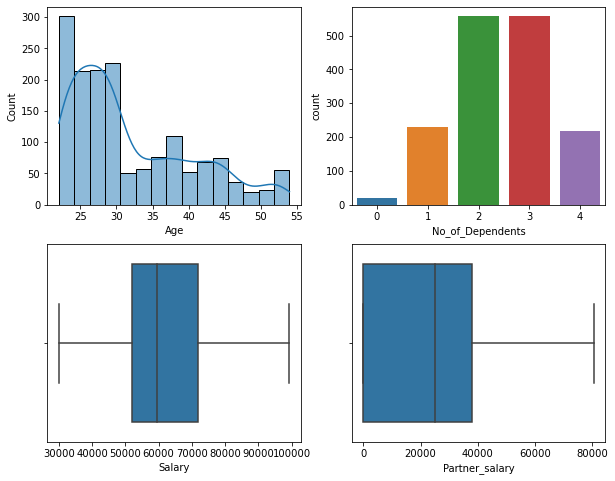

In [13]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sns.histplot(data=austo, x='Age', kde=True, ax=axes[0][0])
sns.countplot(data=austo, x='No_of_Dependents', ax=axes[0][1])
sns.boxplot(data=austo, x='Salary', ax=axes[1][0])
sns.boxplot(data=austo, x='Partner_salary', ax=axes[1][1])
plt.show()

<AxesSubplot:xlabel='Total_salary'>

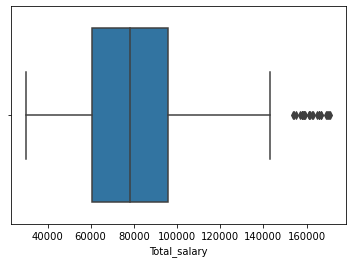

In [14]:
sns.boxplot(data=austo, x='Total_salary')

<AxesSubplot:xlabel='Price'>

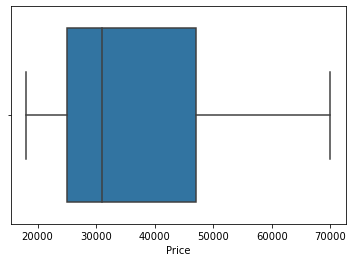

In [15]:
sns.boxplot(x='Price', data=austo)

Total_Salary of the customers are uniformly distributed in the dataset.

##### INSIGHTS:

##### Age of the Customer Ranges from minimum of 22 Years to Maximum of 54 Years, also Age is highly Right skewed. 
##### 75% of the data has 3 No_of_Dependents.
##### Salaries Ranges from 30000 to 99300 with a mean of 60392.22 and have a uniform distribution
##### Partner's Salary is highly negatively skewed with a mean value of 19233.77
##### Total Salary has normal distribution in the dataset but contains multiple outliers
##### Price Range of Austo Car's is left skewed  with no outliers

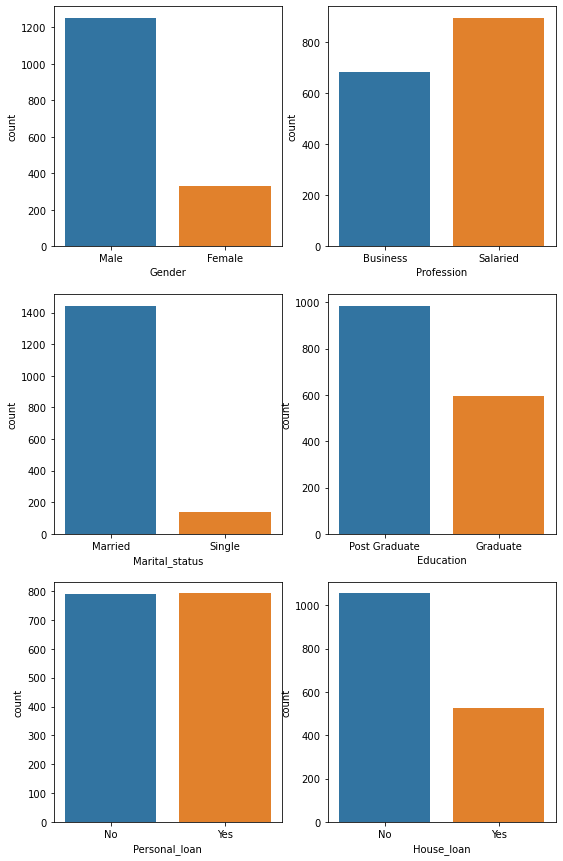

In [16]:
fig, axes=plt.subplots(nrows=3, ncols=2, figsize=(9,15))
sns.countplot(data=austo, x='Gender', ax=axes[0][0])
sns.countplot(data=austo, x='Profession', ax=axes[0][1])
sns.countplot(data=austo, x='Marital_status', ax=axes[1][0])
sns.countplot(data=austo, x='Education', ax=axes[1][1])
sns.countplot(data=austo, x='Personal_loan', ax=axes[2][0])
sns.countplot(data=austo, x='House_loan', ax=axes[2][1])
plt.show()

##### INSIGHTS:

##### Most of the customer counts are Male. 
##### Salaried person are more purchasing the car than a Business Man
##### Married Peoples contributes most in number of purchasing than Singles
##### Most of the Customers of Austo Motor Company are Post Graduated
##### Customers with Personal Loan & without Personal Loan are almost same.
##### Whereas Customers without House_loan are maximum when compared to those who have House_loan

### 1.D Understanding the relationship between all the features of the data

###### Bivariate Analysis

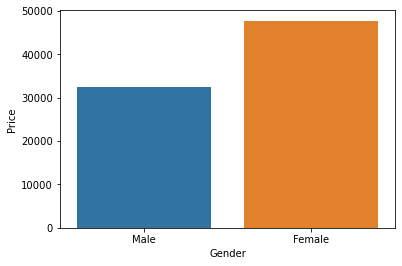

In [19]:
sns.barplot(x='Gender', y='Price', ci=None, data=austo);

- Females have contributed more Average Revenue than Males

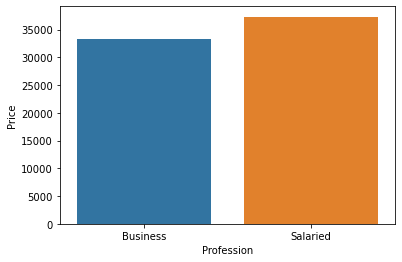

In [20]:
sns.barplot(x='Profession', y='Price', ci=None, data=austo);

In [21]:
pd.crosstab( austo.Make, austo.Profession, values=austo.Price, aggfunc=np.mean,  normalize='all',margins=True)

Profession,Business,Salaried,All
Make,,,
Hatchback,0.112502,0.113928,0.226463
SUV,0.241119,0.237717,0.477531
Sedan,0.142551,0.152184,0.296006
All,0.471979,0.528021,1.000000


- Salaried Professionals has slight high purchasing pattern of Austo Car than Business Professionals
- 47% of all Professions prefers SUV

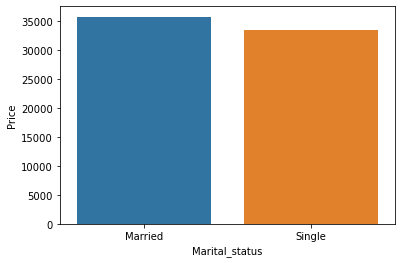

In [22]:
sns.barplot(x='Marital_status', y='Price', ci=None, data=austo);

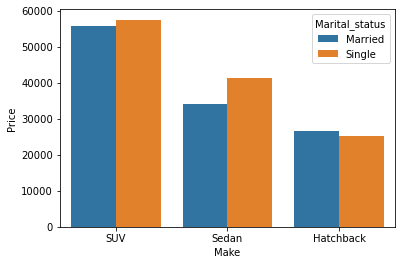

In [23]:
sns.barplot(x='Make', y='Price', hue='Marital_status', ci=None, data=austo);

- Non Married counts are much lower compared to the Married persons but Average Purchase price are just slightly different. Hence, Single's are buying high ticket value Austo Car than Married Person, among which SUV is the most preferred by Married & Single's

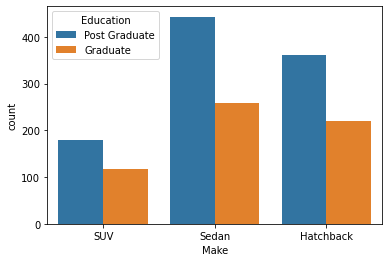

In [24]:
sns.countplot(x='Make', hue='Education', data=austo);

- Sedan are purchased by most numbers of the Post Graduates.

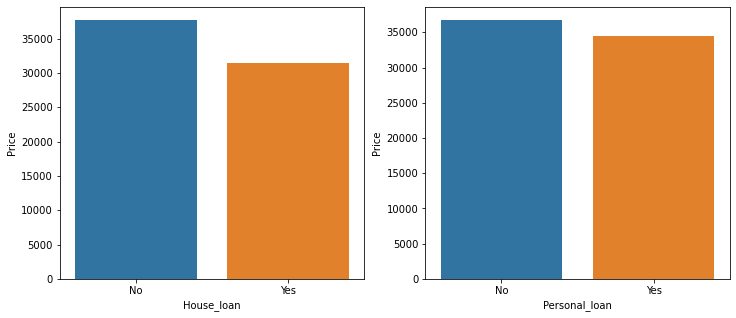

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='House_loan', y='Price', ci=None, data=austo);
plt.subplot(1,2,2)
sns.barplot(x='Personal_loan', y='Price', ci=None, data=austo);
plt.show()

- Clearly, customers who does not have House Loans or Personal loans have a higher purchase pattern.

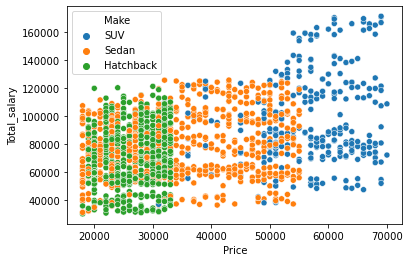

In [26]:
sns.scatterplot(x='Price', y='Total_salary', hue='Make', data=austo);

- There is not much co relation between Salary and purchase type of Austo Cars, but SUV are bought by people of High Salary as it it the costlier in three segments of the car

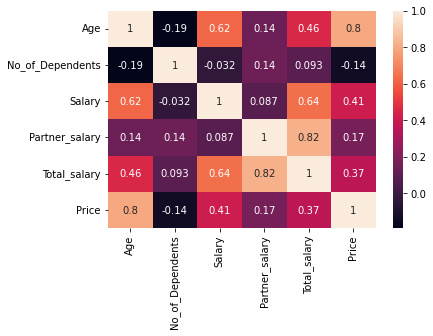

In [27]:
sns.heatmap(austo.corr(), annot=True);

1. Age & Salary has a good positive Correlation, which means as the Age increases the Salary increases.
2. The Age of a person has a good impact in the preference of cars.
 - As the Age increases, salary increases hence they go for costlier brand.

#### 1 E. Justification on the given previous observation

###### E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

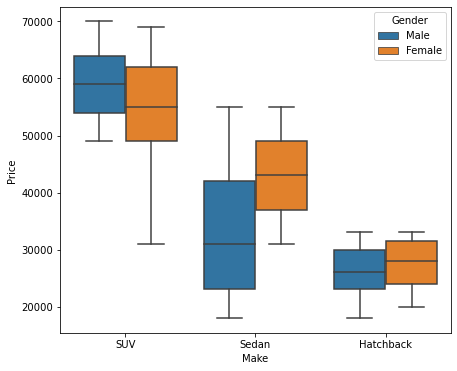

In [32]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Make', y='Price', hue='Gender', data=austo);

In [56]:
pd.pivot_table(austo,'Price', index=['Make'], columns=[ 'Gender'], aggfunc=len, margins=True)

Gender,Female,Male,All
Make,,,
Hatchback,15,567,582
SUV,173,124,297
Sedan,141,561,702
All,329,1252,1581


- Clearly, analyzing the purchase pattern of both Gender, SUV purchased by Females are more than Males
- Also the number of SUV purchased by Women are greater than Men hence, purchase Ratio is also more.
- From the pivot table, Purchase Ratio of Suv by Female is greater than Male 

##### Hence statement made by Steven Roger is incorrect

##### E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

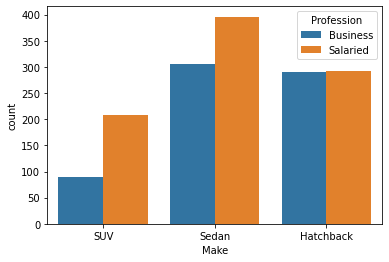

In [57]:
sns.countplot(x='Make', hue='Profession', data=austo);

In [66]:
pd.crosstab(austo.Make, austo.Profession, values=austo.Price, aggfunc=np.sum, normalize='all')

Profession,Business,Salaried
Make,,
Hatchback,0.135554,0.138220
SUV,0.089161,0.205437
Sedan,0.181237,0.250391


- Salaried Professionals are most when comes to buying a Sedan.
- 25% of Sedan Sales comes from Salaried Person
- Hence Statement made by Ned Stark is correct

##### E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

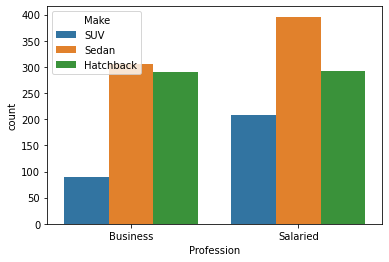

In [47]:
sns.countplot(x='Profession', hue='Make', data=austo);

In [76]:
austo.groupby('Gender')['Profession'].value_counts()

Gender  Profession
Female  Salaried      224
        Business      105
Male    Salaried      672
        Business      580
Name: Profession, dtype: int64

In [70]:
pd.pivot_table(austo,'Price', index=['Make', 'Gender'], columns=[ 'Profession'], aggfunc=len, margins=True)

Profession        Business  Salaried   All
Make      Gender                          
Hatchback Female       NaN      15.0    15
          Male       290.0     277.0   567
SUV       Female      55.0     118.0   173
          Male        34.0      90.0   124
Sedan     Female      50.0      91.0   141
          Male       256.0     305.0   561
All                  685.0     896.0  1581

-  Total Count of Salaried Male are - 672
-  Ratio of Hatchback by Salaried men - 277/672 = 0.41
-  Ratio of SUV by Salaried men - 90/672 = 0.13
-  Ratio of Sedan by Salaried men - 305/672 = 0.45

Salaried person are the most in number who purchases Austo Car from the Barplot but when we tried to derive some more insights from the charts, we found that Ratio of Sedan purchased by Salaried men are most. 
##### Hence above statement is correct

#### F. Amount spent on purchasing automobiles across the following categories. 

##### F1. Amount  Spent on purchasing Automobiles by GENDER

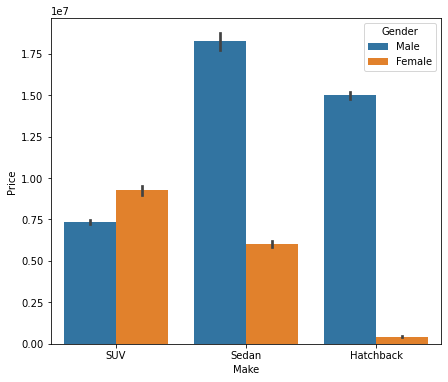

In [79]:
plt.figure(figsize=(7,6))
sns.barplot(x='Make', y='Price', hue='Gender', estimator=np.sum, data=austo);

In [45]:
pd.crosstab (austo.Make, austo.Gender, values=austo.Price, aggfunc=np.mean, normalize='all', margins=True)

Gender,Female,Male,All
Make,,,
Hatchback,0.113585,0.109373,0.226463
SUV,0.221160,0.244388,0.477531
Sedan,0.176883,0.134610,0.296006
All,0.595412,0.404588,1.000000


- Women prefers purchasing High End models of car
- Although Mens have good preferance to buy SUV, they are the primary customer for Low End Models

##### F2) How does peoples with Personal Loan impact the Sale of Automobile?

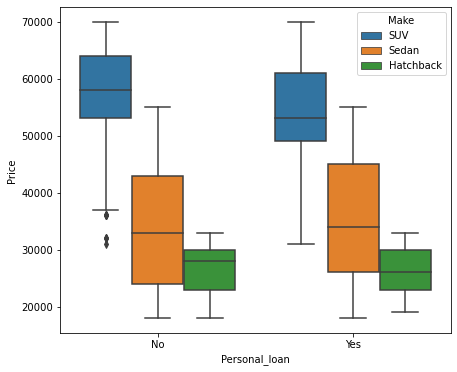

In [86]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Personal_loan', y='Price', hue='Make', data=austo);

In [81]:
pd.crosstab(austo.Make, austo.Personal_loan, values=austo.Price, aggfunc=np.sum, normalize='all')

Personal_loan,No,Yes
Make,,
Hatchback,0.137971,0.135803
SUV,0.184311,0.110288
Sedan,0.192822,0.238806


Sedan are purchased by the peoples who generally takes Personal_loan, while SUV are prefered the one who doesn't perfer Personal_loan to purchase

#### G. Working Partner leads to the purchase of High Price Cars

In [94]:
pd.DataFrame(austo.groupby('Partner_working')['Make'].value_counts())

Make
Partner_working Make           
No              Sedan       288
                Hatchback   281
                SUV         144
Yes             Sedan       414
                Hatchback   301
                SUV         153

In [98]:
pd.crosstab(austo.Make, austo.Partner_working, values=austo.Price, aggfunc=np.sum, normalize='all')

Partner_working,No,Yes
Make,,
Hatchback,0.131432,0.142342
SUV,0.143728,0.150871
Sedan,0.180917,0.250711


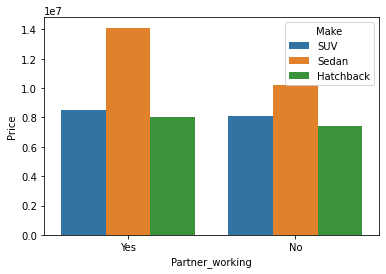

In [99]:
sns.barplot(x='Partner_working', y='Price', hue='Make', estimator=np.sum, ci=None, data=austo);

- Purchase pattern of High priced Car does not, depend on the parameter of Partner_working.

- Sedan has the most Sale contribution towards the Austo Car with the ones whose Partner are working

#### H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [112]:
pd.DataFrame(austo.groupby(['Gender', 'Marital_status', 'Make']).Price.sum())

Price
Gender Marital_status Make               
Female Married        Hatchback    392000
                      SUV         8849000
                      Sedan       5470000
       Single         Hatchback     20000
                      SUV          403000
                      Sedan        561000
Male   Married        Hatchback  12886000
                      SUV         6810000
                      Sedan      17253000
       Single         Hatchback   2110000
                      SUV          518000
                      Sedan       1008000

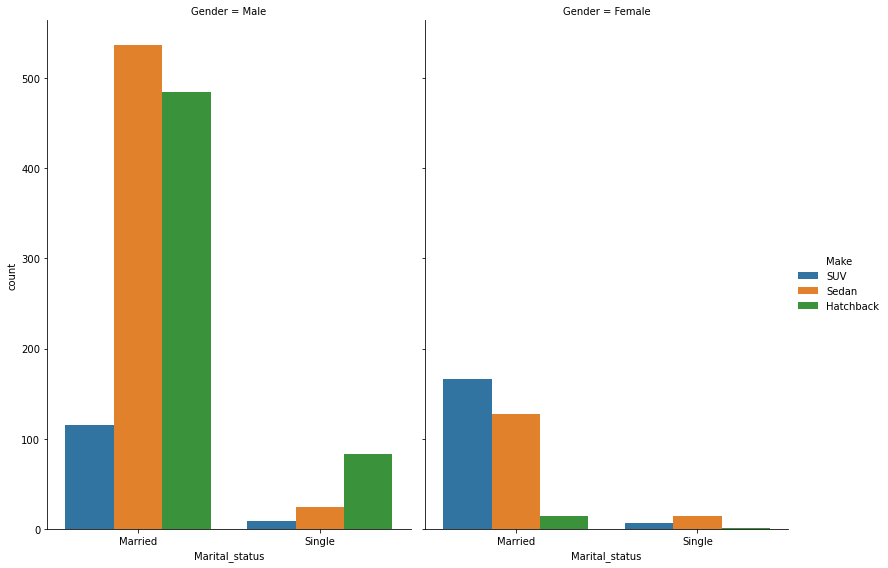

In [113]:
G1 = sns.catplot(x="Marital_status", hue="Make", col="Gender", data=austo, kind="count",height=8, aspect=.7);

- Married Males are the prime customers of the company who majorly contributes in Sedan followed by Hatch Back
- Married Women have a tendency to buy SUV followed by Sedan
- Non Married Men have a potential users of Hatchback and buys this segment of the car other than any other segment
- Non Married Women usually buys Sedan, followed by SUV and very few have buyed the  Hatchback Car

## Problem 2

### A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.

### GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.

### GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

In [118]:
godi= pd.read_excel('godigt_cc_data.xlsx')

In [120]:
godi.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


##### The 5 important variables in the data set are :

      

- cc_limit: This gives the user a limit to utilize the limit of balance given by the bank
- T+3_month_activity: This gives the information about the user activity on the credit card. Is he inactive in 3 month or  utilizing the credit balance
- avg_spends_l3m: This is a important continous variable which informs about the average spend of 3 month. This can help to analyze whether the customer is revolving around the credit limit or paying back the bill at one go, or opting for part payment etc
- Occupation_at_source: This is a categorial variable which gives the employment status of the customer. This is very important to decide the credit limit or risk strategies
- active_90: This is also very important to determine whether the customer is actually in use of the revolving credit balance or just repaying the previous due balance. 

### Thank You